# CellChat analysis of Global DCM object

In [1]:
suppressMessages({
    library(plyr)
    library(CellChat)
    library(patchwork)
    library(SeuratDisk)
    library(Seurat)
    library(SingleCellExperiment)
    library(ggalluvial)
    library(repr)
    library(ggplot2)
    library(RColorBrewer)
    library(cluster)
    #library(dendextend)
})
options(stringsAsFactors = FALSE)

In [2]:
library(ComplexHeatmap)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))




In [3]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/R4.0.5_CellChat/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ComplexHeatmap_2.6.2        cluster_2.1.2              
 [3] RColorBrewer_1.1-2          repr_1.1.3                 
 [5] ggalluvial_0.12.3           SingleCellExperiment_1.12.0
 [7] SummarizedExperiment_1.20.0 GenomicRanges_1.42.0       
 [9] GenomeInfoDb

In [4]:
#options(repr.plot.width = 7, repr.plot.height = 7)
options(repr.plot.width = 12, repr.plot.height = 12)

In [5]:
'%!in%' <- function(x,y)!('%in%'(x,y))

In [6]:
options(future.globals.maxSize = 20000 * 1024 ^ 2)

In [7]:
EDGE.WIDTH.MAX <- 10

In [8]:
OUTDIR <- "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out/"
dir.create(OUTDIR, showWarnings = FALSE)
setwd(OUTDIR)
getwd()

[1] "/home/jovyan/globus/CellChat/ALL_CELLSTATE_V8.1_out"

In [9]:
INDIR <- "/home/jovyan/globus/CellChat/CellChat_V8.1"

In [10]:
cellchat.PKP2.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_RV_CELLSTATES.rds"))

In [11]:
cellchat.TTN.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_RV_CELLSTATES.rds"))

In [12]:
cellchat.RBM20.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_RV_CELLSTATES.rds"))

In [13]:
cellchat.LMNA.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_RV_CELLSTATES.rds"))

In [14]:
cellchat.PVneg.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_RV_CELLSTATES.rds"))

In [15]:
cellchat.control.RV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_RV_CELLSTATES.rds"))

In [16]:
cellchat.PKP2.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PKP2_LV_CELLSTATES.rds"))

In [17]:
cellchat.TTN.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_TTN_LV_CELLSTATES.rds"))

In [18]:
cellchat.RBM20.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_RBM20_LV_CELLSTATES.rds"))

In [19]:
cellchat.LMNA.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_LMNA_LV_CELLSTATES.rds"))

In [20]:
cellchat.PVneg.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_PVneg_LV_CELLSTATES.rds"))

In [21]:
cellchat.control.LV <- readRDS(file = file.path(INDIR, "cellchat_global_V8_control_LV_CELLSTATES.rds"))

In [22]:
# Define the cell labels to lift up
group.new = levels(cellchat.control.LV@idents)
cellchat.control.RV.2 <- liftCellChat(cellchat.control.RV, group.new)
cellchat.PKP2.RV.2 <- liftCellChat(cellchat.PKP2.RV, group.new)
cellchat.TTN.RV.2 <- liftCellChat(cellchat.TTN.RV, group.new)
cellchat.RBM20.RV.2 <- liftCellChat(cellchat.RBM20.RV, group.new)
cellchat.LMNA.RV.2 <- liftCellChat(cellchat.LMNA.RV, group.new)
cellchat.PVneg.RV.2 <- liftCellChat(cellchat.PVneg.RV, group.new)

cellchat.control.LV.2 <- liftCellChat(cellchat.control.LV, group.new)
cellchat.PKP2.LV.2 <- liftCellChat(cellchat.PKP2.LV, group.new)
cellchat.TTN.LV.2 <- liftCellChat(cellchat.TTN.LV, group.new)
cellchat.RBM20.LV.2 <- liftCellChat(cellchat.RBM20.LV, group.new)
cellchat.LMNA.LV.2 <- liftCellChat(cellchat.LMNA.LV, group.new)
cellchat.PVneg.LV.2 <- liftCellChat(cellchat.PVneg.LV, group.new)

The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


The CellChat object will be lifted up using the cell labels AD1.0, AD1.1, AD2, AD3, B, CD4T.act, CD4T.naive, CD4T.reg, CD8T.cytox, CD8T.em, CD8T.te, CD8T.te.IFNGhi, CD8T.trans, EC1.0, EC2.0, EC5.0, EC6.0, EC7.0, EC8.0, ILC, MAIT-like, MO.CD16, MO.VCAN, MP.FOLR2, MP.ISG, MP.LYVE1hi/MHCII.intermediate, MP.LYVE1hi/MHCII.lo, MP.LYVE1lo/MHCII.hi, MP.NFkB, MP.OSM, MP.TREM2, MP.transitional, Mast, Meso, NC1.0, NC1.1, NC1.2, NC1.3, NC2, NC3, NC4, NC5, NK.CD16hi, NK.CD16hiIFNGhi, NK.CD56hi, PC1, PC2, PC3, Plasma, SMC1.1, SMC1.2, SMC2, cDC1, cDC2, prolif.Lymphoids, prolif.Myeloids, vCM1.0, vCM1.1, vCM1.2, vCM1.3, vCM2, vCM3.0, vCM3.1, vCM4, vCM5, vFB1.0, vFB1.1, vFB1.2, vFB2, vFB3, vFB4



Update slots object@net, object@netP, object@idents in a single dataset... 


In [23]:
rm(list = c('cellchat.control.RV','cellchat.PKP2.RV','cellchat.TTN.RV', 'cellchat.RBM20.RV', 'cellchat.LMNA.RV','cellchat.PVneg.RV','cellchat.control.LV','cellchat.PKP2.LV','cellchat.TTN.LV','cellchat.RBM20.LV','cellchat.LMNA.LV','cellchat.PVneg.LV'))

In [24]:
CELLSTATE_CELLTYPE_map <- distinct(cellchat.control.LV.2@meta[c('cell_states','cell_type')])
CELLSTATE_CELLTYPE_map <- data.frame(lapply(CELLSTATE_CELLTYPE_map, as.character), stringsAsFactors=FALSE)
head(CELLSTATE_CELLTYPE_map)

,cell_states,cell_type
,<chr>,<chr>
1,SMC1.2,Mural
2,vCM1.0,CM
3,vCM2,CM
4,EC8.0,EC
5,PC1,Mural
6,vCM3.0,CM


In [25]:
group.CELLTYPE <- mapvalues(group.new, from=CELLSTATE_CELLTYPE_map$cell_states, to=CELLSTATE_CELLTYPE_map$cell_type)

In [26]:
group.CELLTYPE

[1] "AD"       "AD"       "AD"       "AD"       "Lymphoid" "Lymphoid"
 [7] "Lymphoid" "Lymphoid" "Lymphoid" "Lymphoid" "Lymphoid" "Lymphoid"
[13] "Lymphoid" "EC"       "EC"       "EC"       "EC"       "EC"      
[19] "EC"       "Lymphoid" "Lymphoid" "Myeloid"  "Myeloid"  "Myeloid" 
[25] "Myeloid"  "Myeloid"  "Myeloid"  "Myeloid"  "Myeloid"  "Myeloid" 
[31] "Myeloid"  "Myeloid"  "Mast"     "EC"       "NC"       "NC"      
[37] "NC"       "NC"       "NC"       "NC"       "NC"       "NC"      
[43] "Lymphoid" "Lymphoid" "Lymphoid" "Mural"    "Mural"    "Mural"   
[49] "Lymphoid" "Mural"    "Mural"    "Mural"    "Myeloid"  "Myeloid" 
[55] "Lymphoid" "Myeloid"  "CM"       "CM"       "CM"       "CM"      
[61] "CM"       "CM"       "CM"       "CM"       "CM"       "FB"      
[67] "FB"       "FB"       "FB"       "FB"       "FB"

In [27]:
CELLTYPE.ORDER <- c('CM','Mural','FB','EC','Myeloid','Lymphoid','NC','Mast','AD')
REV.CELLTYPE.ORDER <- rev(CELLTYPE.ORDER)
CELLTYPE.PLOT.ORDER <- c(REV.CELLTYPE.ORDER[5:length(REV.CELLTYPE.ORDER)],REV.CELLTYPE.ORDER[1:4]) 
CELLTYPE.PLOT.ORDER

[1] "Myeloid"  "EC"       "FB"       "Mural"    "CM"       "AD"       "Mast"    
[8] "NC"       "Lymphoid"

In [28]:
CELLTYPE.COLOURS <- c('#A6CEE3','#FDB462','#66C2A5','#B2DF8A','#FCCDE5','#FB9A99','#9966FF','#993333','#1F78B4')
REV.CELLTYPE.COLOURS <- rev(CELLTYPE.COLOURS)
CELLTYPE.PLOT.COLOURS <- c(REV.CELLTYPE.COLOURS[5:length(REV.CELLTYPE.COLOURS)],REV.CELLTYPE.COLOURS[1:4]) 
CELLTYPE.PLOT.COLOURS

[1] "#FCCDE5" "#B2DF8A" "#66C2A5" "#FDB462" "#A6CEE3" "#1F78B4" "#993333"
[8] "#9966FF" "#FB9A99"

In [29]:
group.CELLTYPE <- factor(group.CELLTYPE, levels = CELLTYPE.PLOT.ORDER)

In [30]:
levels(group.CELLTYPE)

[1] "Myeloid"  "EC"       "FB"       "Mural"    "CM"       "AD"       "Mast"    
[8] "NC"       "Lymphoid"

In [31]:
group.CELLTYPE

[1] AD       AD       AD       AD       Lymphoid Lymphoid Lymphoid Lymphoid
 [9] Lymphoid Lymphoid Lymphoid Lymphoid Lymphoid EC       EC       EC      
[17] EC       EC       EC       Lymphoid Lymphoid Myeloid  Myeloid  Myeloid 
[25] Myeloid  Myeloid  Myeloid  Myeloid  Myeloid  Myeloid  Myeloid  Myeloid 
[33] Mast     EC       NC       NC       NC       NC       NC       NC      
[41] NC       NC       Lymphoid Lymphoid Lymphoid Mural    Mural    Mural   
[49] Lymphoid Mural    Mural    Mural    Myeloid  Myeloid  Lymphoid Myeloid 
[57] CM       CM       CM       CM       CM       CM       CM       CM      
[65] CM       FB       FB       FB       FB       FB       FB      
Levels: Myeloid EC FB Mural CM AD Mast NC Lymphoid

In [32]:
nrow(CELLSTATE_CELLTYPE_map)

[1] 71

# IGF

In [33]:
signaling.pathway <- 'IGF'

In [34]:
object.list <- list(control.RV = aggregateNet(cellchat.control.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.RV = aggregateNet(cellchat.PKP2.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.RV = aggregateNet(cellchat.TTN.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.RV = aggregateNet(cellchat.RBM20.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.RV = aggregateNet(cellchat.LMNA.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.RV = aggregateNet(cellchat.PVneg.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , control.LV = aggregateNet(cellchat.control.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.LV = aggregateNet(cellchat.PKP2.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.LV = aggregateNet(cellchat.TTN.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.LV = aggregateNet(cellchat.RBM20.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.LV = aggregateNet(cellchat.LMNA.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.LV = aggregateNet(cellchat.PVneg.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8175902,436.7,13019604,695.4,13019604,695.4
Vcells,2615638073,19955.8,4089879240,31203.4,3773789217,28791.8


In [35]:
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.CELLTYPE)})
#object.list <- lapply(object.list, function(x) {mergeInteractionsUnique(x, group.CELLTYPE)})
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8179244,436.9,13019604,695.4,13019604,695.4
Vcells,2615645526,19955.8,4089879240,31203.4,3773789217,28791.8


In [36]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [37]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1011 signaling genes.
 707257 cells.

In [38]:
genotypes <- names(cellchat@net)

In [39]:
genotypes

[1] "control.RV" "PKP2.RV"    "TTN.RV"     "RBM20.RV"   "LMNA.RV"   
 [6] "PVneg.RV"   "control.LV" "PKP2.LV"    "TTN.LV"     "RBM20.LV"  
[11] "LMNA.LV"    "PVneg.LV"

In [40]:
max.weight <- 0
for (GENE in genotypes[!grepl("control",genotypes)]){
    if (grepl('RV$', GENE)) {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    } else {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.LV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    }
    print(paste(GENE, temp))
}

[1] "PKP2.RV 0.00123950579353282"
[1] "TTN.RV 0.00144661262167965"
[1] "RBM20.RV 0.00120256152596941"
[1] "LMNA.RV 0.00153107653233512"
[1] "PVneg.RV 0.0012947769242008"
[1] "PKP2.LV 0.00106438836974448"
[1] "TTN.LV 0.000875164803671929"
[1] "RBM20.LV 0.000740547651008455"
[1] "LMNA.LV 0.0007600172984744"
[1] "PVneg.LV 0.000777030947768037"


In [41]:
max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))

[1] 0.0007948269

In [42]:
max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))

[1] 0.0007948269

In [43]:
max.weight

[1] 0.001531077

In [44]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8185274,437.2,13019604,695.4,13019604,695.4
Vcells,2676016957,20416.4,7515714449,57340.4,7401969032,56472.6


## Make circle plots

In [45]:
genotypes

[1] "control.RV" "PKP2.RV"    "TTN.RV"     "RBM20.RV"   "LMNA.RV"   
 [6] "PVneg.RV"   "control.LV" "PKP2.LV"    "TTN.LV"     "RBM20.LV"  
[11] "LMNA.LV"    "PVneg.LV"

In [46]:
names(cellchat@net$weight)

NULL

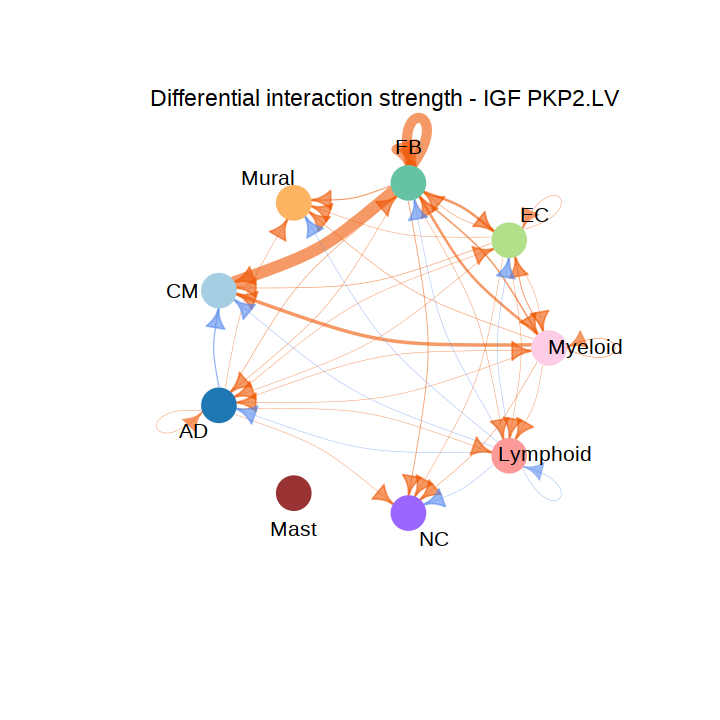

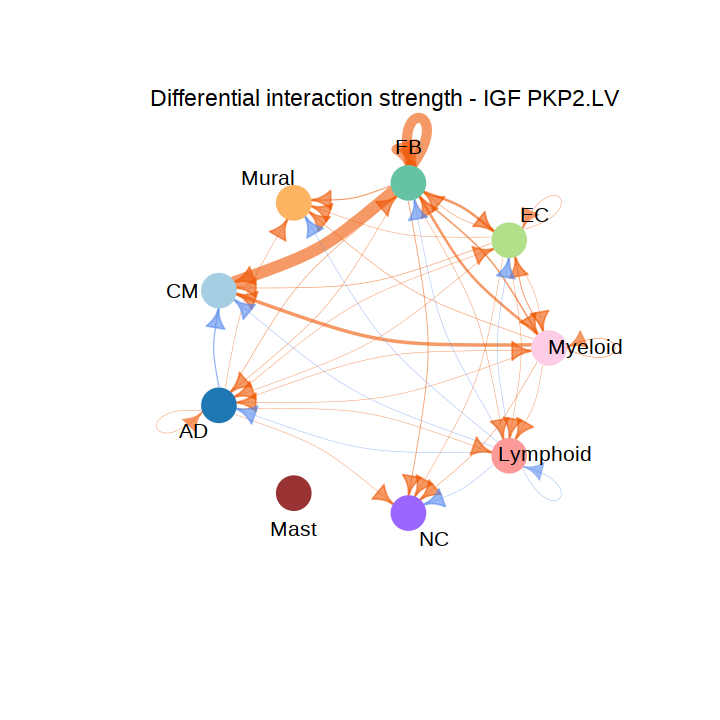

In [47]:
options(repr.plot.width = 6, repr.plot.height = 6)
i=8
netVisual_diffInteraction(cellchat, comparison=c(7,i), weight.scale = T, edge.weight.max = max.weight, measure = "weight.merged", label.edge = F, arrow.size = 1, arrow.width=1.5, margin=0.3,title.name = paste("Differential interaction strength -", signaling.pathway, genotypes[i], sep=' ')
                         #, color.use = c('#A6CEE3','#FDB462','#66C2A5','#B2DF8A','#FCCDE5','#FB9A99','#9966FF','#993333','#1F78B4')
                         , color.use = CELLTYPE.PLOT.COLOURS
                         , color.edge = c('#EF5600','#5689EF')
                         , edge.width.max = EDGE.WIDTH.MAX
                         )

In [48]:
options(repr.plot.width = 4, repr.plot.height = 4)
for (i in c(2:6)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'_strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(1,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

for (i in c(8:12)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

# PERIOSTIN

In [49]:
signaling.pathway <- 'PERIOSTIN'

In [50]:
object.list <- list(control.RV = aggregateNet(cellchat.control.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.RV = aggregateNet(cellchat.PKP2.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.RV = aggregateNet(cellchat.TTN.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.RV = aggregateNet(cellchat.RBM20.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.RV = aggregateNet(cellchat.LMNA.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.RV = aggregateNet(cellchat.PVneg.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , control.LV = aggregateNet(cellchat.control.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.LV = aggregateNet(cellchat.PKP2.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.LV = aggregateNet(cellchat.TTN.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.LV = aggregateNet(cellchat.RBM20.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.LV = aggregateNet(cellchat.LMNA.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.LV = aggregateNet(cellchat.PVneg.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8232640,439.7,13019604,695.4,13019604,695.4
Vcells,2676239729,20418.1,7515714449,57340.4,7401969032,56472.6


In [51]:
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.CELLTYPE)})
#object.list <- lapply(object.list, function(x) {mergeInteractionsUnique(x, group.CELLTYPE)})

In [52]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [53]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1011 signaling genes.
 707257 cells.

In [54]:
genotypes <- names(cellchat@net)

In [55]:
max.weight <- 0
for (GENE in genotypes[!grepl("control",genotypes)]){
    if (grepl('RV$', GENE)) {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    } else {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.LV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    }
    print(paste(GENE, temp))
}

[1] "PKP2.RV 3.1310062077533e-05"
[1] "TTN.RV 0.000315783287673369"
[1] "RBM20.RV 8.29626189501368e-06"
[1] "LMNA.RV 0.000108742595664665"
[1] "PVneg.RV 0.000166139056390147"
[1] "PKP2.LV 3.50583857837312e-06"
[1] "TTN.LV 0.000121772829484687"
[1] "RBM20.LV 6.0915675376388e-05"
[1] "LMNA.LV 6.4840202525065e-06"
[1] "PVneg.LV 1.81100086689175e-05"


In [56]:
max.weight

[1] 0.0003157833

In [57]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8232356,439.7,13019604,695.4,13019604,695.4
Vcells,2676114601,20417.2,7515714449,57340.4,7514745588,57333.0


## Make circle plots

In [58]:
genotypes

[1] "control.RV" "PKP2.RV"    "TTN.RV"     "RBM20.RV"   "LMNA.RV"   
 [6] "PVneg.RV"   "control.LV" "PKP2.LV"    "TTN.LV"     "RBM20.LV"  
[11] "LMNA.LV"    "PVneg.LV"

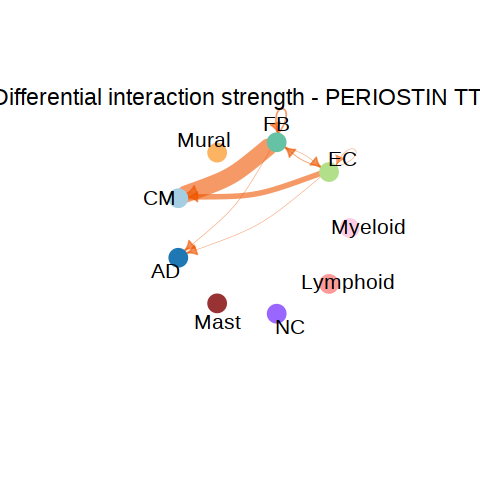

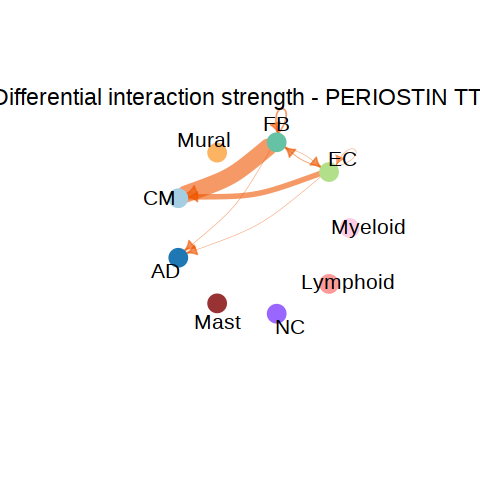

In [59]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=3
netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), weight.scale = T, edge.weight.max = max.weight, measure = "weight.merged", label.edge = F, arrow.size = 1, arrow.width=1.5, margin=0.3,title.name = paste("Differential interaction strength -", signaling.pathway, genotypes[i], sep=' ')
                         #, color.use = c('#A6CEE3','#FDB462','#66C2A5','#B2DF8A','#FCCDE5','#FB9A99','#9966FF','#993333','#1F78B4')
                         , color.use = CELLTYPE.PLOT.COLOURS
                         , color.edge = c('#EF5600','#5689EF')
                         , edge.width.max = EDGE.WIDTH.MAX
                         )

In [60]:
options(repr.plot.width = 4, repr.plot.height = 4)
for (i in c(2:6)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'_strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(1,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

for (i in c(8:12)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

In [61]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8234872,439.8,13019604,695.4,13019604,695.4
Vcells,2676123461,20417.3,7515714449,57340.4,7514745588,57333.0


# NRG

In [62]:
signaling.pathway <- 'NRG'

In [63]:
object.list <- list(control.RV = aggregateNet(cellchat.control.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.RV = aggregateNet(cellchat.PKP2.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.RV = aggregateNet(cellchat.TTN.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.RV = aggregateNet(cellchat.RBM20.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.RV = aggregateNet(cellchat.LMNA.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.RV = aggregateNet(cellchat.PVneg.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , control.LV = aggregateNet(cellchat.control.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.LV = aggregateNet(cellchat.PKP2.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.LV = aggregateNet(cellchat.TTN.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.LV = aggregateNet(cellchat.RBM20.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.LV = aggregateNet(cellchat.LMNA.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.LV = aggregateNet(cellchat.PVneg.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8234500,439.8,13019604,695.4,13019604,695.4
Vcells,2676244059,20418.2,7515714449,57340.4,7514745588,57333.0


In [64]:
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.CELLTYPE)})
#object.list <- lapply(object.list, function(x) {mergeInteractionsUnique(x, group.CELLTYPE)})

In [65]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [66]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1011 signaling genes.
 707257 cells.

In [67]:
genotypes <- names(cellchat@net)

In [68]:
max.weight <- 0
for (GENE in genotypes[!grepl("control",genotypes)]){
    if (grepl('RV$', GENE)) {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    } else {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.LV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    }
    print(paste(GENE, temp))
}

[1] "PKP2.RV 0.00223448358634535"
[1] "TTN.RV 0.000216527674055215"
[1] "RBM20.RV 0.000768972749031199"
[1] "LMNA.RV 0.00157714255899028"
[1] "PVneg.RV 0.00142107000383343"
[1] "PKP2.LV 0.00258899111136251"
[1] "TTN.LV 0.00211632777984724"
[1] "RBM20.LV 0.0022681418706582"
[1] "LMNA.LV 0.00152043644690776"
[1] "PVneg.LV 0.0033364862651844"


In [69]:
max.weight

[1] 0.003336486

## Make circle plots

In [70]:
genotypes

[1] "control.RV" "PKP2.RV"    "TTN.RV"     "RBM20.RV"   "LMNA.RV"   
 [6] "PVneg.RV"   "control.LV" "PKP2.LV"    "TTN.LV"     "RBM20.LV"  
[11] "LMNA.LV"    "PVneg.LV"

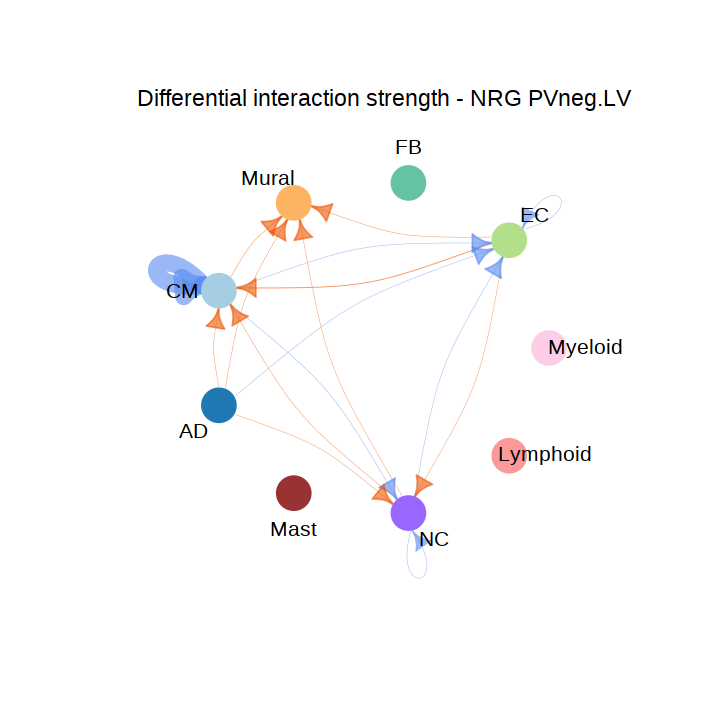

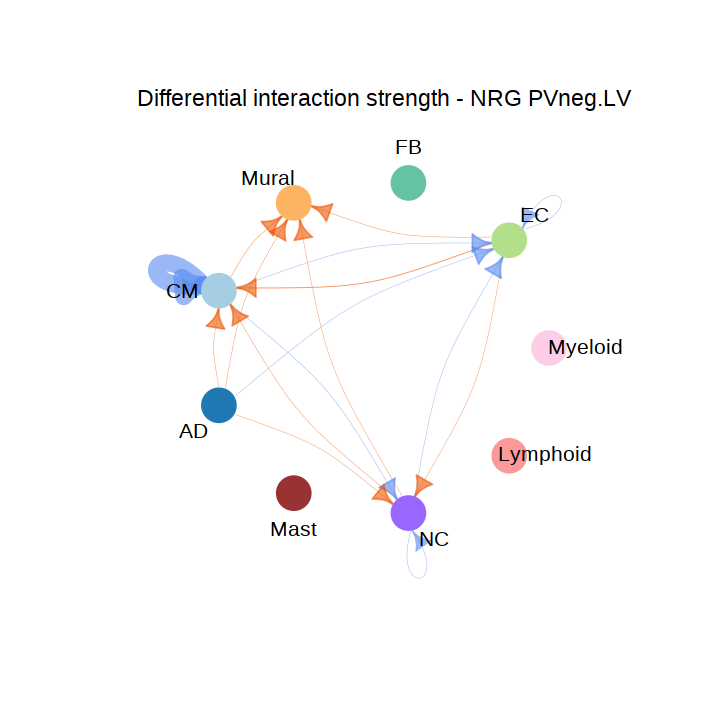

In [71]:
options(repr.plot.width = 6, repr.plot.height = 6)
i=12
netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), weight.scale = T, edge.weight.max = max.weight, measure = "weight.merged", label.edge = F, arrow.size = 1, arrow.width=1.5, margin=0.3,title.name = paste("Differential interaction strength -", signaling.pathway, genotypes[i], sep=' ')
                         #, color.use = c('#A6CEE3','#FDB462','#66C2A5','#B2DF8A','#FCCDE5','#FB9A99','#9966FF','#993333','#1F78B4')
                         , color.use = CELLTYPE.PLOT.COLOURS
                         , color.edge = c('#EF5600','#5689EF')
                         , edge.width.max = EDGE.WIDTH.MAX
                         )

In [72]:
options(repr.plot.width = 4, repr.plot.height = 4)
for (i in c(2:6)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'_strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(1,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

for (i in c(8:12)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

In [73]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8234917,439.8,13019604,695.4,13019604,695.4
Vcells,2676124548,20417.3,7515714449,57340.4,7514749915,57333.0


# BMP

In [74]:
signaling.pathway <- 'BMP'

In [75]:
object.list <- list(control.RV = aggregateNet(cellchat.control.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.RV = aggregateNet(cellchat.PKP2.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.RV = aggregateNet(cellchat.TTN.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.RV = aggregateNet(cellchat.RBM20.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.RV = aggregateNet(cellchat.LMNA.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.RV = aggregateNet(cellchat.PVneg.RV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , control.LV = aggregateNet(cellchat.control.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PKP2.LV = aggregateNet(cellchat.PKP2.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , TTN.LV = aggregateNet(cellchat.TTN.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , RBM20.LV = aggregateNet(cellchat.RBM20.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , LMNA.LV = aggregateNet(cellchat.LMNA.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
                  , PVneg.LV = aggregateNet(cellchat.PVneg.LV.2, signaling = signaling.pathway, remove.isolate = FALSE)
)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8234499,439.8,13019604,695.4,13019604,695.4
Vcells,2676244058,20418.2,7515714449,57340.4,7514749915,57333.0


In [76]:
object.list <- lapply(object.list, function(x) {mergeInteractions(x, group.CELLTYPE)})
#object.list <- lapply(object.list, function(x) {mergeInteractionsUnique(x, group.CELLTYPE)})

In [77]:
cellchat <- mergeCellChat(object.list, add.names = names(object.list))
#> Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.

Merge the following slots: 'data.signaling','net', 'netP','meta', 'idents', 'var.features' , 'DB', and 'LR'.



In [78]:
cellchat

An object of class CellChat created from a merged object with multiple datasets 
 1011 signaling genes.
 707257 cells.

In [79]:
genotypes <- names(cellchat@net)

In [80]:
max.weight <- 0
for (GENE in genotypes[!grepl("control",genotypes)]){
    if (grepl('RV$', GENE)) {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.RV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    } else {
        temp <- max(abs(cellchat@net[[GENE]]$weight.merged - cellchat@net$control.LV$weight.merged))
        if (max.weight < temp) {
            max.weight <- temp
        }
    }
    print(paste(GENE, temp))
}

[1] "PKP2.RV 0.000936736990974821"
[1] "TTN.RV 0.00213079419127017"
[1] "RBM20.RV 0.000433813479020675"
[1] "LMNA.RV 0.000508179389046838"
[1] "PVneg.RV 0.000405409405731994"
[1] "PKP2.LV 0.000334408282936669"
[1] "TTN.LV 0.0012818766236223"
[1] "RBM20.LV 0.00034908174284786"
[1] "LMNA.LV 0.000340334740985607"
[1] "PVneg.LV 0.000495268237248051"


In [81]:
max.weight

[1] 0.002130794

## Make circle plots

In [82]:
genotypes

[1] "control.RV" "PKP2.RV"    "TTN.RV"     "RBM20.RV"   "LMNA.RV"   
 [6] "PVneg.RV"   "control.LV" "PKP2.LV"    "TTN.LV"     "RBM20.LV"  
[11] "LMNA.LV"    "PVneg.LV"

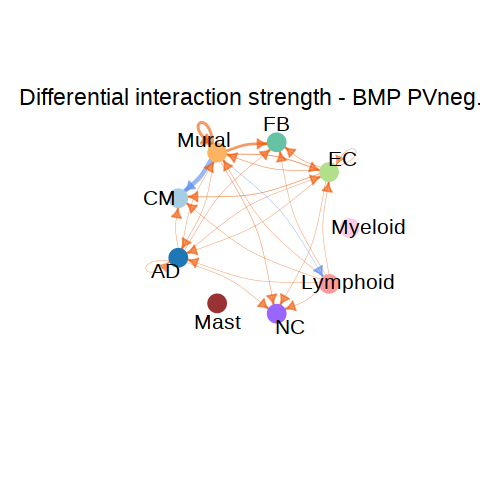

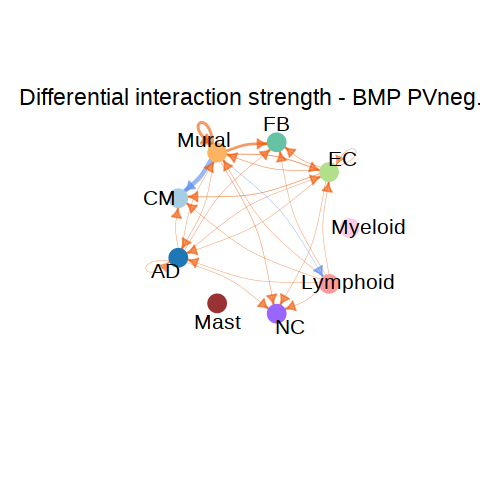

In [83]:
options(repr.plot.width = 4, repr.plot.height = 4)
i=12
netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), weight.scale = T, edge.weight.max = max.weight, measure = "weight.merged", label.edge = F, arrow.size = 1, arrow.width=1.5, margin=0.3,title.name = paste("Differential interaction strength -", signaling.pathway, genotypes[i], sep=' ')
                         #, color.use = c('#A6CEE3','#FDB462','#66C2A5','#B2DF8A','#FCCDE5','#FB9A99','#9966FF','#993333','#1F78B4')
                         , color.use = CELLTYPE.PLOT.COLOURS
                         , color.edge = c('#EF5600','#5689EF')
                         , edge.width.max = EDGE.WIDTH.MAX
                         )

In [84]:
options(repr.plot.width = 4, repr.plot.height = 4)
for (i in c(2:6)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'_strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(1,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

for (i in c(8:12)){
    pdf(file= paste('netVisual_diffInteraction', signaling.pathway, genotypes[i] ,'strength_standard_scale.pdf', sep='_'), width = 4, height = 4)
    netVisual_diffInteraction(cellchat, top=1, comparison=c(7,i), 
                              weight.scale = T, edge.weight.max = max.weight, edge.width.max = EDGE.WIDTH.MAX, 
                              measure = "weight.merged", label.edge = F, arrow.size = 0.8, arrow.width=1, 
                              margin=0.3,title.name = paste(signaling.pathway, genotypes[i], sep=' '), 
                              color.edge = c('#EF5600','#5689EF'), color.use = CELLTYPE.PLOT.COLOURS, 
                              alpha.edge = 0.8)
    graphics.off()
}

In [85]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8234918,439.8,13019604,695.4,13019604,695.4
Vcells,2676125143,20417.3,7515714449,57340.4,7514749916,57333.0
